# Analise dos dados utilizando Word2Vec

Alunos: Arthur B. Pinotti, Eduardo Brandt, Henrique F. de Azevedo, Kaue Reblin, Luiz G. Klitzke

In [3]:
import spacy
import numpy as np
import csv
from sklearn.manifold import TSNE
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [6]:
!pip install spacy
!python -m spacy download en_core_web_lg


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     -------------------------------------- 0.0/400.7 MB 165.2 kB/s eta 0:40:26
     -------------------------------------- 0.0/400.7 MB 187.9 kB/s eta 0:35:33
     -------------------------------------- 0.1/400.7 MB 328.2 kB/s eta 0:20:21
     ---------------------------------------- 0.3/400.7 MB 1.5 MB/s eta 0:04:25
     ---------------------------------------- 0.8/400.7 MB 3.2 MB/s eta 0:02:06
     ---------------------------------------- 1.4/400.7 MB 4.6 MB/s eta 0:01:27
     ---------------------------------------- 2.1/400.7 MB 6.1 MB/s eta 0:01:06
     ---------------------------------------- 2.9/400.7 MB 7.5 MB/s eta 0:00:54
     ---------------------------------------- 3.9/400.7 MB 8.9 MB/s eta 0:00:45
     --------------------------------------- 5.0/400.7 MB 10.3 MB/s eta 0:00:39
      -------------------------------------- 6.3/400.7


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
nlp = spacy.load('en_core_web_lg')  # carrega modelo em inglês

### Carregar os dados do .CSV

Esses dados já foram pré-processados, passando por remoção de stopwords, pontuações e etc.

In [8]:
import csv

# Criação de listas para armazenar os dados que entrarão no DataFrame
documents = []
todas = []
vazias = []

quantidade = 0

# Etapa 2: Iterar pelos arquivos e ler o conteúdo
with open("DadosMinerados.csv", "r", encoding='utf-8') as infile:
    reader = csv.reader(infile, delimiter=',')

    # Pular os headers
    next(reader, None)  # skip the headers

    for row in reader:
        if row[0] == "nome":
          continue

        if quantidade == 50:
            break

        quantidade += 1

        documents.append(row[1])

        words = row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", "").split(" ")

        for word in words:

          if word.isnumeric():
            continue

          word = word.replace("’s", "")
          pesos = nlp.vocab[word]
          todas.append(word)

          if not np.any(pesos.vector):
            vazias.append(word)
print("Total :" + str(len(todas)) + " | Vazias: " + str(len(vazias)))
unicas_todas = set(todas)
unicas_vazias = set(vazias)
print("Total unico:" + str(len(unicas_todas)) + " | Vazias unicas: " + str(len(unicas_vazias)))

print("Todas:" + str(unicas_todas))
print("Vazias:" + str(unicas_vazias))

Total :3578 | Vazias: 59
Total unico:824 | Vazias unicas: 30
Todas:{'used', 'strand', 'things', 'bonus', 'phosphorus', 'separate', 'try', 'inanimate', 'faint', 'quarterstaff', 'instantaneously', 'direction', 'winks', 'three', 'skunk', 'uses', 'fungus', 'certain', 'around', 'directed', 'flea', 'benefit', 'cauldron', 'thin', 'otherwise', 'images', 'fleece', 'utter', 'puff', 'electronic', 'willingly', 'device', 'thorn', 'whisper', 'unleash', 'receive', 'fit', 'fall', 'shocking', 'grants', 'bloom', 'sheet', 'technomagic', 'another', 'radius', 'items', '4d12', 'wood', 'form', 'willing', 'instead', 'poison', 'investigation', 'project', 'raven', 'shut', '1d12', 'druidcraft', 'slashing', 'vaguely', 'wire', 'south', 'firefly', 'guide', 'spectral', 'snuff', 'mage', 'worn', 'prone', 'bolt', 'enchantments', 'number', 'turn', 'streaks', 'imbue', 'saving', 'reactions', '3d10', 'melee', 'casting', '10foot', 'artificer', 'whispers', 'understand', 'necromancy', 'neither', 'transmutation', 'noninstantan

### Similaridade em Nível de Sentença/Documento

In [9]:
import pandas as pd

def GetVetorSimilaridade(doc):
  target = nlp(doc)  # texto sobre gatos

  similaridade = []

  for doc_compare in documents:
    doc_nlp = nlp(doc_compare)

    similaridade.append(target.similarity(doc_nlp))

  return similaridade

similaridades = []

for doc in documents:
  similaridades.append(GetVetorSimilaridade(doc))

# Convertendo para um DataFrame para melhor visualização
df = pd.DataFrame(similaridades, index  =[f"Doc{i+1}" for i in range(len(documents))],
                                 columns=[f"Doc{i+1}" for i in range(len(documents))])

df

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,...,Doc41,Doc42,Doc43,Doc44,Doc45,Doc46,Doc47,Doc48,Doc49,Doc50
Doc1,1.000000,0.940440,0.971615,0.970359,0.939817,0.972789,0.940192,0.933902,0.921964,0.953090,...,0.941227,0.978027,0.940783,0.978947,0.985256,0.978903,0.947591,0.979678,0.960553,0.983867
Doc2,0.940440,1.000000,0.946517,0.959653,0.934277,0.952474,0.932308,0.928697,0.929813,0.934085,...,0.951730,0.925730,0.940938,0.953985,0.948854,0.948658,0.967537,0.947737,0.946388,0.937864
Doc3,0.971615,0.946517,1.000000,0.985446,0.930759,0.976913,0.931641,0.928659,0.918154,0.957532,...,0.928987,0.967845,0.933883,0.984132,0.976663,0.985445,0.947100,0.974982,0.956640,0.970664
Doc4,0.970359,0.959653,0.985446,1.000000,0.953338,0.988716,0.950940,0.949266,0.944573,0.962516,...,0.950614,0.950066,0.957604,0.985335,0.974405,0.988998,0.971269,0.983562,0.965400,0.968906
Doc5,0.939817,0.934277,0.930759,0.953338,1.000000,0.961069,0.979925,0.962625,0.978623,0.951025,...,0.936322,0.902614,0.988595,0.945190,0.932481,0.949423,0.959738,0.950666,0.931900,0.938558
Doc6,0.972789,0.952474,0.976913,0.988716,0.961069,1.000000,0.961776,0.952345,0.950237,0.958317,...,0.948701,0.955657,0.959573,0.980759,0.978874,0.984785,0.967964,0.980670,0.958722,0.973342
Doc7,0.940192,0.932308,0.931641,0.950940,0.979925,0.961776,1.000000,0.951899,0.975113,0.955461,...,0.931410,0.907922,0.975137,0.949085,0.936298,0.943506,0.957910,0.941552,0.928832,0.933815
Doc8,0.933902,0.928697,0.928659,0.949266,0.962625,0.952345,0.951899,1.000000,0.962576,0.926657,...,0.935318,0.909440,0.959096,0.946687,0.929385,0.946838,0.942156,0.944780,0.928307,0.935746
Doc9,0.921964,0.929813,0.918154,0.944573,0.978623,0.950237,0.975113,0.962576,1.000000,0.934520,...,0.927111,0.886924,0.977647,0.940290,0.920622,0.935926,0.950821,0.934257,0.913390,0.921215
Doc10,0.953090,0.934085,0.957532,0.962516,0.951025,0.958317,0.955461,0.926657,0.934520,1.000000,...,0.932644,0.923755,0.949610,0.957461,0.945722,0.960236,0.954574,0.956450,0.945070,0.947540


### Visualização em Heatmaps

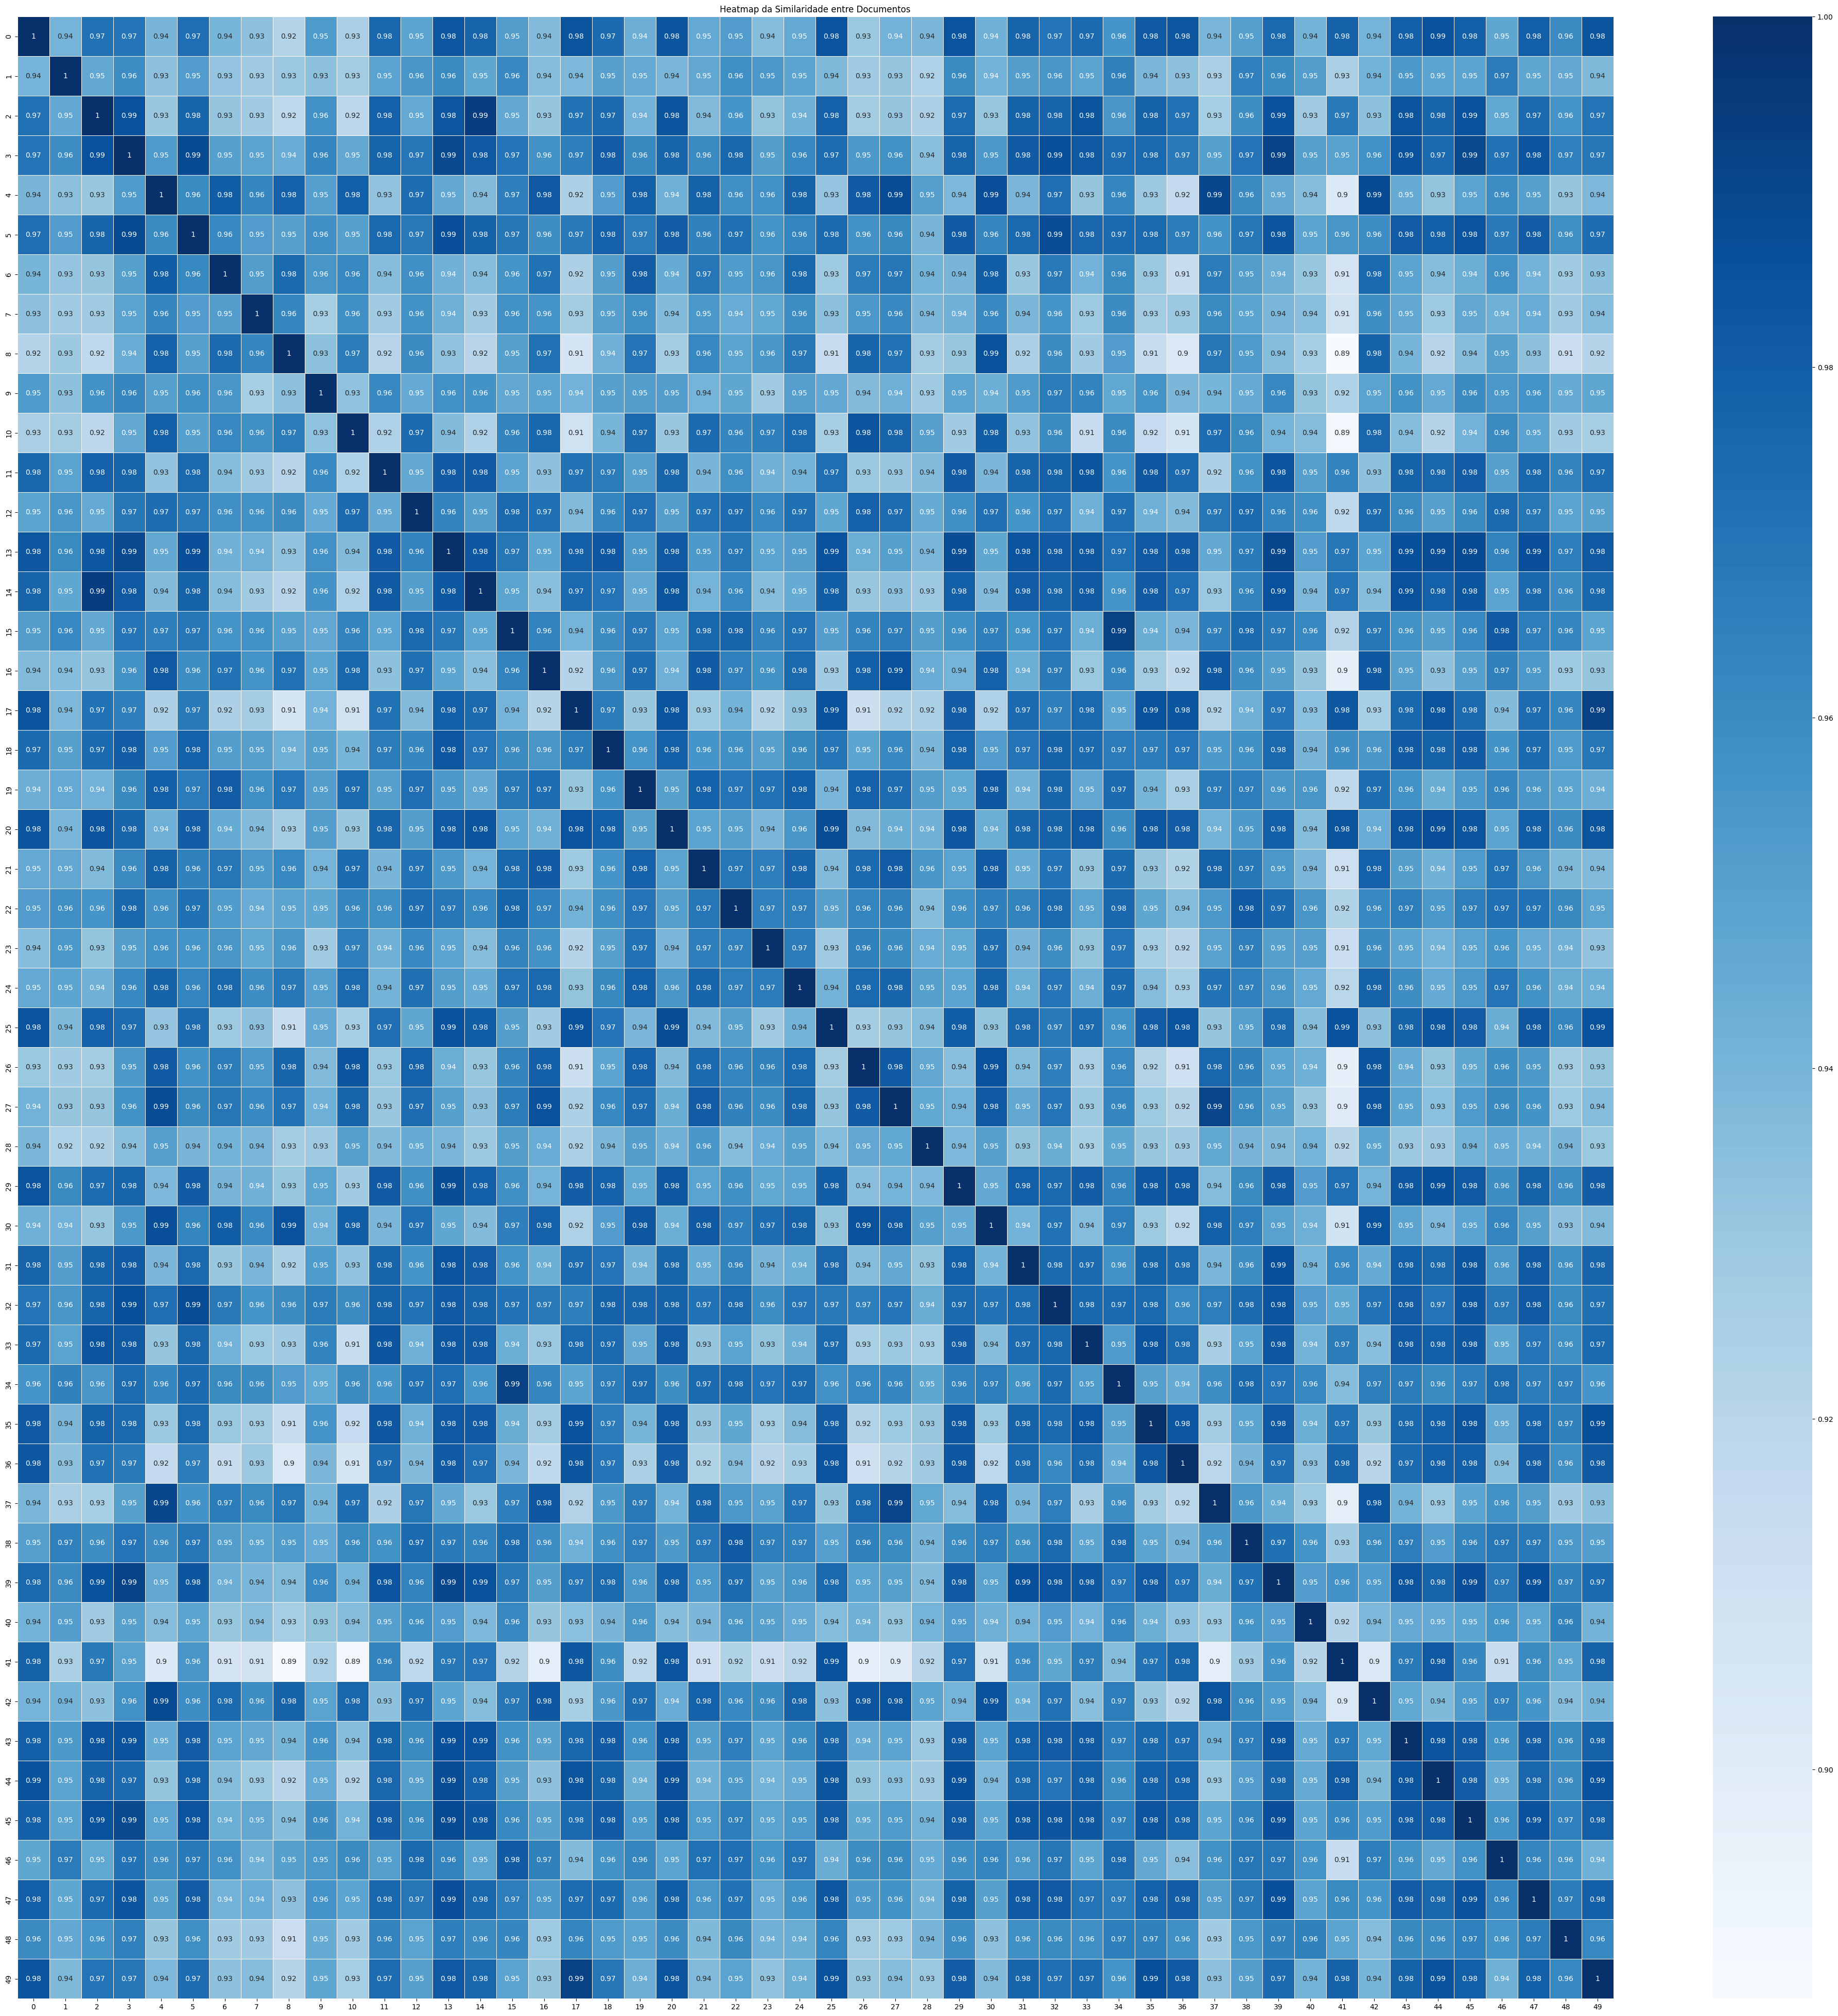

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o tamanho da figura
plt.figure(figsize=(50, 50))

# Gerando o heatmap da matriz de similaridade por cosseno
sns.heatmap(similaridades, annot=True, cmap='Blues', linewidths=0.5)

# Definindo o título do heatmap
plt.title('Heatmap da Similaridade entre Documentos')

# Exibindo o gráfico
plt.show()